## Group Members
- Sanjana Srinivasan
- Kriti Amin
- Jackrite To
- Dhwani Solanki
- Marie Keller

In [134]:
import pandas as pd
import seaborn as sns

# Exercise 1 - Understanding your dataset (13 points)

Load the processedClevelandData.csv dataset. The features for the dataset are
described in the featureDescription.csv file.

In [168]:
#Loading Dataset
cleveland_data = pd.read_csv('https://raw.githubusercontent.com/jackrite/LSI/7bfbc37ae42916d962dc7ec3730b67885ca46108/processedClevelandData.csv', sep=';', index_col=0)

In [169]:
cleveland_data

,Unnamed: 0.1,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,0,1,63.0,1.0,1.0,145.0,233.0 mg/dl,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
1,1,2,67.0,1.0,4.0,160.0,286.0 mg/dl,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2
2,2,3,67.0,1.0,4.0,120.0,229.0 mg/dl,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
3,3,4,37.0,1.0,3.0,130.0,250.0 mg/dl,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
4,4,5,41.0,0.0,2.0,130.0,204.0 mg/dl,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,299,45.0,1.0,1.0,110.0,264.0 mg/dl,0.0,0.0,132.0,0.0,2.0,0.0,7.0,1
299,299,300,68.0,1.0,4.0,144.0,193.0 mg/dl,1.0,0.0,141.0,0.0,2.0,2.0,7.0,2
300,300,301,57.0,1.0,4.0,130.0,131.0 mg/dl,0.0,0.0,115.0,1.0,2.0,1.0,7.0,3
301,301,302,57.0,0.0,2.0,130.0,236.0 mg/dl,0.0,2.0,174.0,0.0,2.0,1.0,3.0,1


In [170]:
cleveland_descr = pd.read_csv('featureDescription.csv', sep=';')
cleveland_descr

,features,description
0,id,patient identification number
1,Age,age in years
2,"Sex;""sex (1 = male; 0 = female) """,NaN
3,"cp;""chest pain type",NaN
4,-- Value 1: typical angina,NaN
5,-- Value 2: atypical angina,NaN
6,-- Value 3: non-anginal pain,NaN
7,"-- Value 4: asymptomatic """,NaN
8,trestbps,resting blood pressure (in mm Hg on admission ...
9,chol,serum cholestoral in mg/dl


#### 1. Perform data cleaning procedures such that your final dataset is usable in the following questions.

In [171]:
def data_preprocessing(dataset):
    '''The function takes a pandas dataset as input and removes duplicate rows as well as rows\
    with missing values or ? as a value.'''
    print('Number of duplicate rows in the dataset = ', dataset.duplicated().sum())
    dataset1=dataset.drop_duplicates()
    print('Number of missing values in the dataset = ' , dataset.isnull().sum().sum())
    dataset2=dataset1.dropna()
    for x in dataset2.columns:
        dataset2 = dataset2[~dataset2[x].isin(['?'])]
    print('Number of removed rows in the dataset = ', dataset.shape[0]-dataset2.shape[0])
    return dataset2

In [172]:
cl_data=data_preprocessing(cleveland_data)
cl_data

Number of duplicate rows in the dataset =  0
Number of missing values in the dataset =  0
Number of removed rows in the dataset =  6


,Unnamed: 0.1,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,0,1,63.0,1.0,1.0,145.0,233.0 mg/dl,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
1,1,2,67.0,1.0,4.0,160.0,286.0 mg/dl,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2
2,2,3,67.0,1.0,4.0,120.0,229.0 mg/dl,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
3,3,4,37.0,1.0,3.0,130.0,250.0 mg/dl,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
4,4,5,41.0,0.0,2.0,130.0,204.0 mg/dl,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,298,57.0,0.0,4.0,140.0,241.0 mg/dl,0.0,0.0,123.0,1.0,2.0,0.0,7.0,1
298,298,299,45.0,1.0,1.0,110.0,264.0 mg/dl,0.0,0.0,132.0,0.0,2.0,0.0,7.0,1
299,299,300,68.0,1.0,4.0,144.0,193.0 mg/dl,1.0,0.0,141.0,0.0,2.0,2.0,7.0,2
300,300,301,57.0,1.0,4.0,130.0,131.0 mg/dl,0.0,0.0,115.0,1.0,2.0,1.0,7.0,3


#### 2. For each type of diagnosis of heart disease, find the following for the resting blood pressure: 
    a. Mean
    b. Median
    c. Standard deviation

In [68]:
#divide the data by the type of diagnosis of heart disease

cl_data_0=cl_data[(cl_data['num'] == 0)]
cl_data_1=cl_data[(cl_data['num'] == 1)]

In [73]:
#show the data
print(cl_data_0)
print(cl_data_1)

      Age  Sex   cp  trestbps   chol  fbs  resetecg  thalach  exang  slope  \
id                                                                           
1    63.0  1.0  1.0     145.0  233.0  1.0       2.0    150.0    0.0    3.0   
4    37.0  1.0  3.0     130.0  250.0  0.0       0.0    187.0    0.0    3.0   
5    41.0  0.0  2.0     130.0  204.0  0.0       2.0    172.0    0.0    1.0   
6    56.0  1.0  2.0     120.0  236.0  0.0       0.0    178.0    0.0    1.0   
8    57.0  0.0  4.0     120.0  354.0  0.0       0.0    163.0    1.0    1.0   
..    ...  ...  ...       ...    ...  ...       ...      ...    ...    ...   
284  35.0  1.0  2.0     122.0  192.0  0.0       0.0    174.0    0.0    1.0   
289  56.0  1.0  2.0     130.0  221.0  0.0       2.0    163.0    0.0    1.0   
290  56.0  1.0  2.0     120.0  240.0  0.0       0.0    169.0    0.0    3.0   
292  55.0  0.0  2.0     132.0  342.0  0.0       0.0    166.0    0.0    1.0   
296  41.0  1.0  2.0     120.0  157.0  0.0       0.0    182.0    

In [84]:
def get_median(dataset, col):
    '''Returns the median of a specific column in the dataset.'''
    return 'Median: ', round(dataset[col].median(),2)

def get_mean(dataset, col):
    '''Returns the mean of a specific column in the dataset.'''
    return 'Mean: ', round(dataset[col].mean(),2)

def get_std(dataset, col):
    '''Returns the standard deviation of a specific column in the dataset.'''
    return 'Standard deviation: ', round(dataset[col].std(),2)

In [85]:
print('For the heart disease diagnosis 0 (< 50% diameter narrowing):')
print(get_median(cl_data_0, 'trestbps'))
print(get_mean(cl_data_0, 'trestbps'))
print(get_std(cl_data_0, 'trestbps'))

For the heart disease diagnosis 0 (< 50% diameter narrowing):
('Median: ', 130.0)
('Mean: ', 129.18)
('Standard deviation: ', 16.37)


In [86]:
print('For the heart disease diagnosis 1 (> 50% diameter narrowing):')
print(get_median(cl_data_1, 'trestbps'))
print(get_mean(cl_data_1, 'trestbps'))
print(get_std(cl_data_1, 'trestbps'))

For the heart disease diagnosis 1 (> 50% diameter narrowing):
('Median: ', 130.0)
('Mean: ', 134.64)
('Standard deviation: ', 18.9)


#### 3. Use Spearman's and Kendall correlation to quantify the correlation between age and the following.
    a. Resting blood pressure
    b. Serum cholesterol level
    c. Maximum heart rate achieved
#### Also, which variable(s) are most correlated with age? Illustrate with heatmaps.


In [105]:
def spearman_corr(dataset, col1, col2):
    '''Returns the spearman correlation between two given columns of a dataset.'''
    return round(dataset[col1].corr(dataset[col2], method='spearman'),2)

def kendall_corr(dataset, col1, col2):
    '''Returns the kendall correlation between two given columns of a dataset.'''
    return round(dataset[col1].corr(dataset[col2], method='kendall'),2)

In [104]:
print('Spearman correlation between age and resting blood pressure: ', spearman_corr(cl_data, 'Age', 'trestbps'))
print('Kendall correlation between age and resting blood pressure: ', kendall_corr(cl_data, 'Age', 'trestbps'))

Spearman correlation between age and resting blood pressure:  0.3
Kendall correlation between age and resting blood pressure:  0.21


In [106]:
print('Spearman correlation between age and Serum cholesterol level: ', spearman_corr(cl_data, 'Age', 'chol'))
print('Kendall correlation between age and Serum cholesterol level: ', kendall_corr(cl_data, 'Age', 'chol'))

Spearman correlation between age and Serum cholesterol level:  0.18
Kendall correlation between age and Serum cholesterol level:  0.13


In [126]:
print('Spearman correlation between age and Maximum heart rate achieved: ', spearman_corr(cl_data, 'Age', 'thalach'))
print('Kendall correlation between age and Maximum heart rate achieved: ', kendall_corr(cl_data, 'Age', 'thalach'))

Spearman correlation between age and Maximum heart rate achieved:  -0.39
Kendall correlation between age and Maximum heart rate achieved:  -0.28


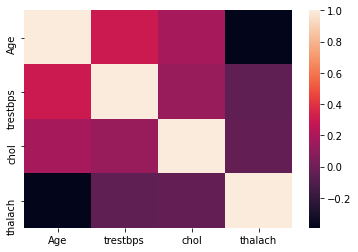

In [149]:
cl_data2=cl_data[['Age','trestbps', 'chol', 'thalach']]
sp_cor=cl_data2.corr(method='spearman')
sp_heatmap=sns.heatmap(sp_cor)

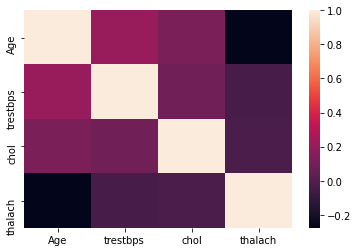

In [150]:
ke_cor=cl_data2.corr(method='kendall')
ke_heatmap=sns.heatmap(ke_cor)

The most correlation exists between Age and the Maximum heart rate achieved. 

#### 4. From your understanding, which of the features can be labeled as discrete random variables and which features as continuous random variables?


#### 5. Describe the distribution for the values of the "thalach" feature? Illustrate with a plot.

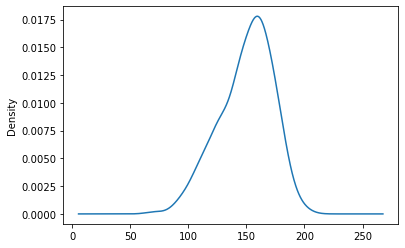

In [120]:
cl_data['thalach'].plot.density()

#### 6. Plot the frequency of “Sex” variable in the dataset and describe what you observe in the plot. Similarly plot and describe the 'ca' feature for the male participants.

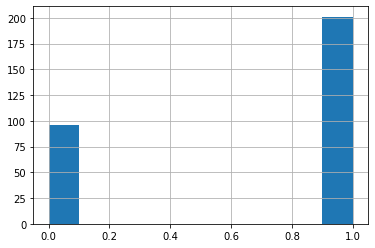

In [173]:
cl_data['Sex'].hist()

In [127]:
cl_data_male=cl_data[(cl_data['Sex'] == 1)]

In [130]:
cl_data_male

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
6,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,1.0,0.0,3.0,0
297,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,2.0,2.0,6.0,1
299,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,2.0,0.0,7.0,1


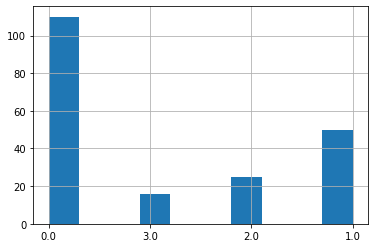

In [128]:
cl_data_male['ca'].hist()

#### 7. Detect outlier patients for features "trestbps'' and "chol". Illustrate with plots.


In [ ]:
#upper bound is defined as Q3 -1.5*IQR
#lower bound is defined as Q1 – 1.5*IQR

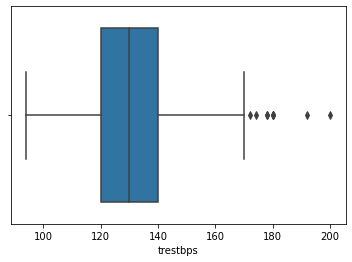

In [131]:
sns.boxplot(cl_data['trestbps'])

In [138]:
trestbps_Q1 = cl_data['trestbps'].quantile(0.25)
trestbps_Q3 = cl_data['trestbps'].quantile(0.75)

trestbps_IQR = trestbps_Q3 - trestbps_Q1 

In [158]:
trestbps_outliers_upper = cl_data[(cl_data['trestbps'] >= (trestbps_Q3+1.5*trestbps_IQR))]
print('Upper outliers: \n' ,trestbps_outliers_upper['trestbps'])

trestbps_outliers_lower = cl_data[(cl_data['trestbps'] <= (trestbps_Q1-1.5*trestbps_IQR))]
print('Lower outliers: \n' ,trestbps_outliers_lower['trestbps'])

Upper outliers: 
 id
15     172.0
69     170.0
84     180.0
127    200.0
142    170.0
173    174.0
184    178.0
189    192.0
202    180.0
214    178.0
232    180.0
276    170.0
287    170.0
Name: trestbps, dtype: float64
Lower outliers: 
 Series([], Name: trestbps, dtype: float64)


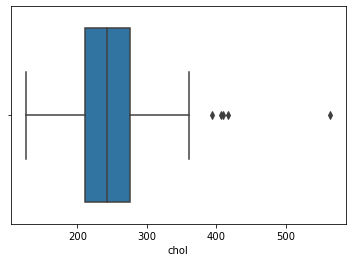

In [132]:
sns.boxplot(cl_data['chol'])

In [147]:
chol_Q1 = cl_data['chol'].quantile(0.25)
chol_Q3 = cl_data['chol'].quantile(0.75)

chol_IQR = chol_Q3 - chol_Q1

In [162]:
chol_outliers_upper = cl_data[(cl_data['chol'] >= (chol_Q3+1.5*chol_IQR))]
print('Upper outliers: \n' ,chol_outliers_upper['chol'])

chol_outliers_lower = cl_data[(cl_data['chol'] <= (chol_Q1-1.5*chol_IQR))]
print('Lower outliers: \n' ,chol_outliers_lower['chol'])

Upper outliers: 
 id
49     417.0
122    407.0
153    564.0
174    394.0
182    409.0
Name: chol, dtype: float64
Lower outliers: 
 Series([], Name: chol, dtype: float64)


Both features only have upper outliers which can also be seen in the histograms. 